Directly download the dataset from kaggle using api

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131258","key":"5cc292bc58798bdbf958636f8f9ed5bd"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:01<00:00, 216MB/s]
100% 225M/225M [00:01<00:00, 191MB/s]


In [ ]:
!ls -lrth

total 225M
drwxr-xr-x 1 root root 4.0K Apr  8 13:32 sample_data
-rw-r--r-- 1 root root   63 Apr 17 08:28 kaggle.json
-rw-r--r-- 1 root root 225M Apr 17 08:29 flowers-recognition.zip


!unzipping the flower dataset

In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [ ]:
!ls -lrth flowers/
# !mv flowers/flowers/ content/
# !ls -lrth content/flowers

total 232K
drwxr-xr-x 2 root root 44K Apr 17 08:29 daisy
drwxr-xr-x 2 root root 56K Apr 17 08:29 dandelion
drwxr-xr-x 2 root root 40K Apr 17 08:29 rose
drwxr-xr-x 2 root root 36K Apr 17 08:29 sunflower
drwxr-xr-x 2 root root 56K Apr 17 08:29 tulip


The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# from



Declaring local varibles to be used in this process

In [ ]:
imgs_path='flowers/'
img_size=224
batch_size=32


**Data preprocessing -1
this way we can get better accuracy as we r converting images into array and preprocessing images and feeding to the neural networks as numerical data**

In [ ]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data(imgs_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


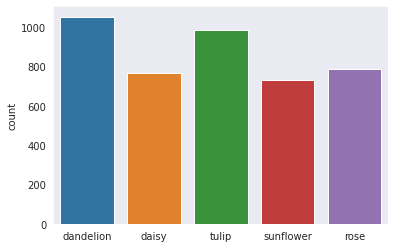

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

The dataset seems balanced as for each training label , enough training examples exist



Randomly Previewing first 10 images



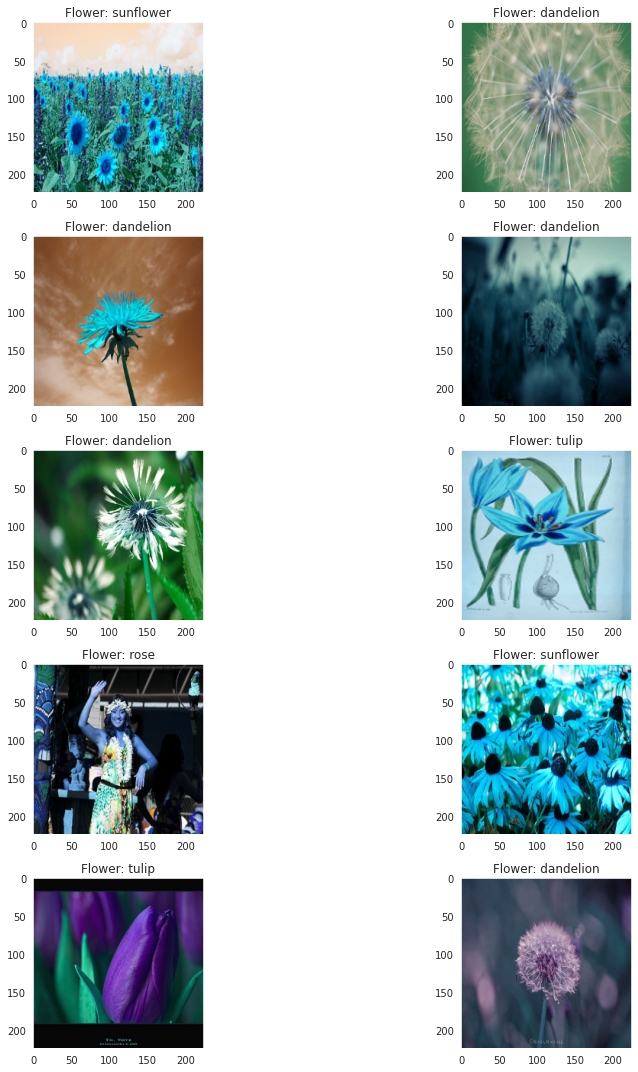

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])

plt.tight_layout()

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
# Normalize the data
# from keras.applications.vgg16 import preproces
from tensorflow.keras.applications.xception import Xception,preprocess_input
x = np.array(x)
x=preprocess_input(x)
x[0]

array([[[-0.19215685, -0.34117645, -0.3960784 ],
        [-0.19215685, -0.34117645, -0.3960784 ],
        [-0.19215685, -0.3490196 , -0.38823527],
        ...,
        [-0.6       , -0.73333335, -0.75686276],
        [-0.6       , -0.73333335, -0.75686276],
        [-0.6       , -0.73333335, -0.75686276]],

       [[-0.19215685, -0.34117645, -0.3960784 ],
        [-0.19215685, -0.34117645, -0.3960784 ],
        [-0.19215685, -0.3490196 , -0.38823527],
        ...,
        [-0.5921569 , -0.7254902 , -0.7490196 ],
        [-0.6       , -0.73333335, -0.75686276],
        [-0.6       , -0.73333335, -0.75686276]],

       [[-0.19215685, -0.34117645, -0.3960784 ],
        [-0.19215685, -0.3490196 , -0.38823527],
        [-0.19215685, -0.3490196 , -0.38823527],
        ...,
        [-0.5921569 , -0.7254902 , -0.7490196 ],
        [-0.5921569 , -0.73333335, -0.75686276],
        [-0.6       , -0.73333335, -0.75686276]],

       ...,

       [[-0.0745098 , -0.24705881, -0.29411763],
        [-0

In [ ]:
x.shape

(4317, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
print(f' X_Train shape is {x_train.shape}, y_train shape is {y_train.shape}')
print(f' X_test shape is {x_test.shape}, y_test shape is {y_test.shape}')

 X_Train shape is (3453, 224, 224, 3), y_train shape is (3453, 5)
 X_test shape is (864, 224, 224, 3), y_test shape is (864, 5)


In [ ]:
del x,y,data

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model
from tensorflow.keras.layers import MaxPool2D,Dense,Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential


pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

model=Sequential()
model.add(pre_trained_model)
model.add(MaxPool2D((2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
'''model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])'''

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



80150528/80134624 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 5)                 23045     
                                                                 
Total params: 20,047,429
Trainable params: 4,742,661
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 3)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=8,batch_size=64,callbacks=[callbacks_list])

Epoch 1/8
54/54 [==============================] - 66s 954ms/step - loss: 0.8169 - accuracy: 0.6950 - val_loss: 0.4613 - val_accuracy: 0.8299 - lr: 0.0010
Epoch 2/8
54/54 [==============================] - 43s 808ms/step - loss: 0.3458 - accuracy: 0.8746 - val_loss: 0.3903 - val_accuracy: 0.8681 - lr: 0.0010
Epoch 3/8
54/54 [==============================] - 44s 814ms/step - loss: 0.1945 - accuracy: 0.9302 - val_loss: 0.4083 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 4/8
54/54 [==============================] - 44s 818ms/step - loss: 0.0990 - accuracy: 0.9652 - val_loss: 0.4897 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 5/8
54/54 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9734
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
54/54 [==============================] - 44s 819ms/step - loss: 0.0839 - accuracy: 0.9734 - val_loss: 0.5853 - val_accuracy: 0.8530 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

27/27 [==============================] - 9s 321ms/step - loss: 0.5853 - accuracy: 0.8530
Loss of the model is -  0.585273027420044
27/27 [==============================] - 9s 321ms/step - loss: 0.5853 - accuracy: 0.8530
Accuracy of the model is -  85.3009283542633 %


Text(0.5, 1.0, 'val accuracy')

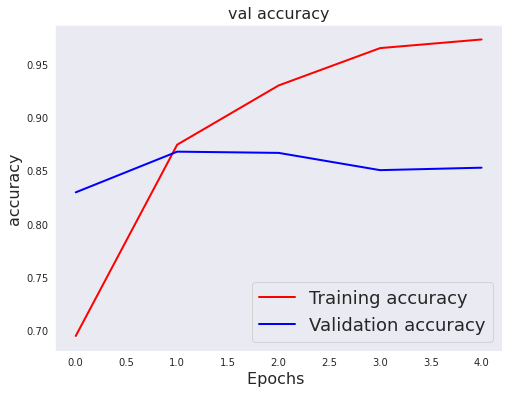

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

In [ ]:
class_names=os.listdir(imgs_path)

Accuracy : 85.30092592592592


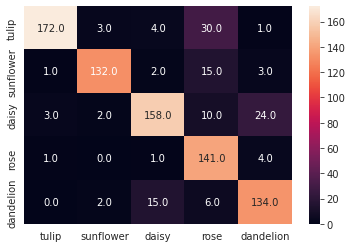

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_labels)):
    if(y_test_labels[i] == y_pred_classes[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_labels)):
    if(y_test_labels[i] != y_pred_classes[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correctly classified images

In [ ]:
y_test_labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


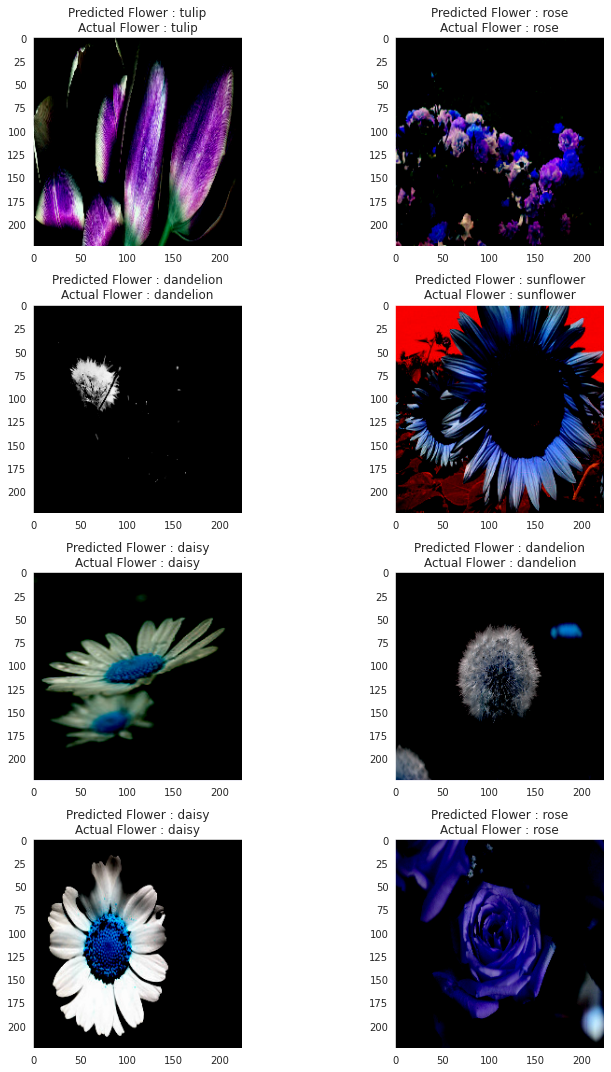

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[y_pred_classes[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_labels[prop_class[count]]])
        plt.tight_layout()
        count+=1

mis-classified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


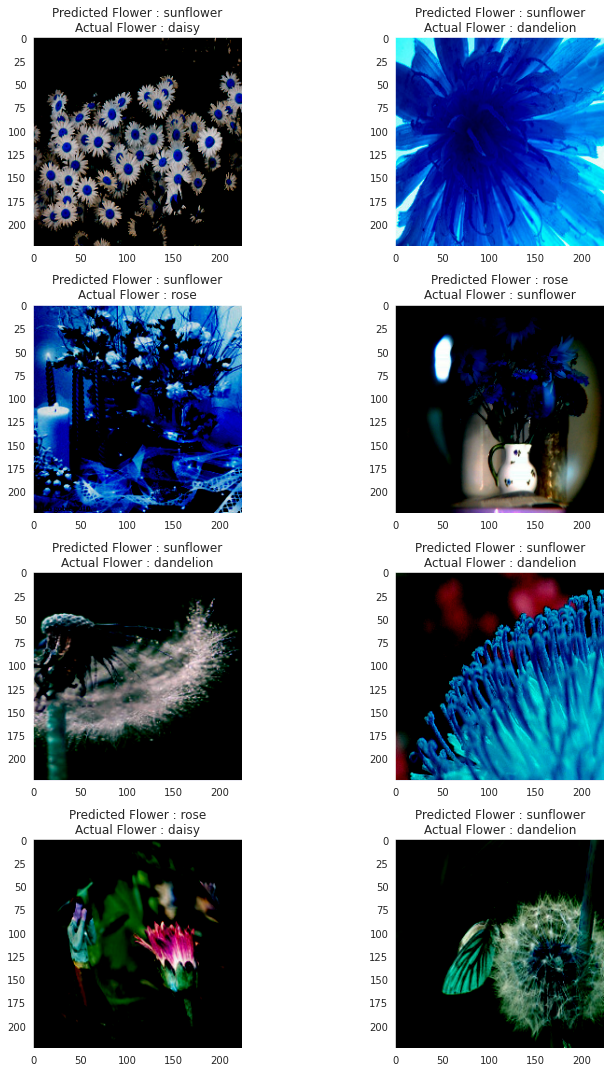

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[y_pred_classes[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_labels[mis_class[count]]])
        plt.tight_layout()
        count+=1

Now testing on external images

In [ ]:
from google.colab import files
files.upload()

Saving test2.jpg to test2.jpg


{'test2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc

(1, 224, 224, 3)

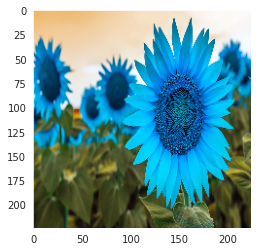

In [ ]:
image_name='sunflower.jpg'   # enter image to test
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)  #
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
# plt.imshow(x)
# Normalize the data
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

**getting predictions**

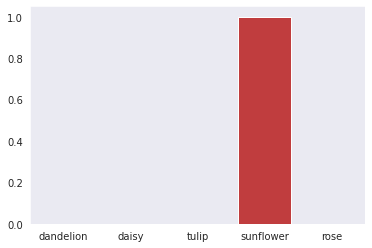

In [ ]:
pred=model.predict(x1) # for predicting class
# print(pred)
# prob=model.predict_proba(x1)  # predicting probability
labels_pred=np.argmax(pred,axis=0)
# labels=get_labels(labels_pred)
flowers = ["dandelion","daisy","tulip","sunflower","rose"]
pred_results=pd.DataFrame(data=pred,columns=flowers)
# print(pred_results.head())
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
plt.show()
# pred_results.head()